# 6.5 Unsupervised Machine Learning

## Contents
### Import Libraries and dataframe
### Elbow technique
### k-means clustering

In [7]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [9]:
%matplotlib inline

In [11]:
# import dataframe

path = 'C:/Users/Jack Bartman/OneDrive/CareerFoundry/MV Trips'

In [13]:
tripS = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Trips_by_Distance_state_wrangeled.csv'))

In [15]:
tripS.shape

(98073, 24)

In [17]:
tripS.head(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Level,Date,State Postal Code,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,...,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month,State
0,0,887,887,State,2019/01/01,NV,NaN,753054.0,2272063.0,9139676.0,...,1108436.0,222837.0,93301.0,73578.0,24471.0,18427.0,32-00000-20190101,0,1,Nevada
1,1,888,888,State,2019/01/01,FL,NaN,4524666.0,16709556.0,55258300.0,...,6604304.0,2113009.0,796740.0,412224.0,95341.0,93887.0,12-00000-20190101,0,1,Florida
2,2,889,889,State,2019/01/01,DC,NaN,241030.0,459278.0,3114055.0,...,183744.0,42096.0,10730.0,8109.0,3476.0,5616.0,11-00000-20190101,0,1,District of Columbia
3,3,890,890,State,2019/01/01,DE,NaN,224457.0,739757.0,2420942.0,...,314102.0,128454.0,50542.0,22701.0,2474.0,2198.0,10-00000-20190101,0,1,Delaware
4,4,891,891,State,2019/01/01,CT,NaN,853894.0,2707851.0,9468961.0,...,1211252.0,449947.0,192960.0,56618.0,12031.0,31268.0,09-00000-20190101,0,1,Connecticut


In [40]:
tripS = tripS.drop('Unnamed: 0.2', axis=1)

In [42]:
tripS = tripS.drop('Unnamed: 0.1', axis=1)

In [44]:
tripS = tripS.drop('Unnamed: 0', axis=1)

In [46]:
tripS = tripS.drop('Level', axis=1)

In [48]:
tripS = tripS.drop('State Postal Code', axis=1)

In [50]:
tripS = tripS.drop('County Name', axis=1)

In [52]:
tripS = tripS.drop('State', axis=1)

In [58]:
tripS = tripS.drop('Date', axis=1)

In [62]:
tripS = tripS.drop('Row ID', axis=1)

#### Elbow Technique

In [54]:
# define number of clusters 

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [64]:
# create a score for the rate of variation in a cluster

score = [kmeans[i].fit(tripS).score(tripS) for i in range(len(kmeans))]

In [66]:
score

[-9.147513000438576e+19,
 -3.050227375444079e+19,
 -1.3705662787624825e+19,
 -9.293659653650162e+18,
 -5.399165009119622e+18,
 -4.0101731374079237e+18,
 -3.105483058799773e+18,
 -2.323583701035951e+18,
 -1.962041628892655e+18]

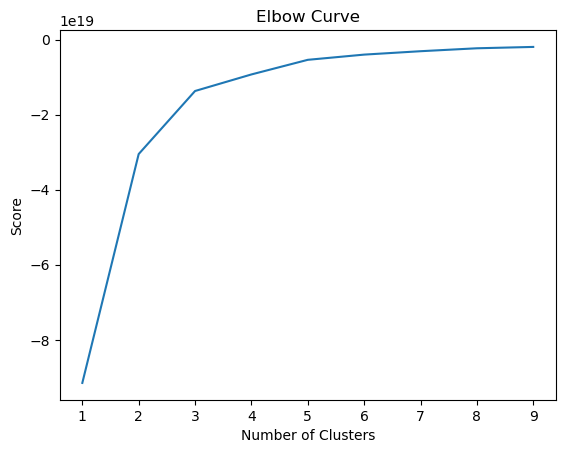

In [68]:
# Plot elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### This curve has a significant break a 3, so I will use 3 clusters

### k-means clustering

In [72]:
# Create k-means object.

kmeans = KMeans(n_clusters = 3)

In [74]:
# Fit the k-means object to the data.

kmeans.fit(tripS)

KMeans(n_clusters=3)

In [78]:
tripS['clusters'] = kmeans.fit_predict(tripS)

In [82]:
tripS.head()

,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Week,Month,clusters
0,753054.0,2272063.0,9139676.0,2999886.0,2181216.0,1039500.0,1378024.0,1108436.0,222837.0,93301.0,73578.0,24471.0,18427.0,0,1,0
1,4524666.0,16709556.0,55258300.0,16036792.0,14469767.0,6658624.0,7977612.0,6604304.0,2113009.0,796740.0,412224.0,95341.0,93887.0,0,1,2
2,241030.0,459278.0,3114055.0,1314825.0,833796.0,367547.0,344116.0,183744.0,42096.0,10730.0,8109.0,3476.0,5616.0,0,1,0
3,224457.0,739757.0,2420942.0,584323.0,640348.0,305441.0,370359.0,314102.0,128454.0,50542.0,22701.0,2474.0,2198.0,0,1,0
4,853894.0,2707851.0,9468961.0,2375021.0,2618933.0,1189575.0,1331356.0,1211252.0,449947.0,192960.0,56618.0,12031.0,31268.0,0,1,0


In [84]:
tripS['clusters'].value_counts()

clusters
0    60276
2    30880
1     6917
Name: count, dtype: int64

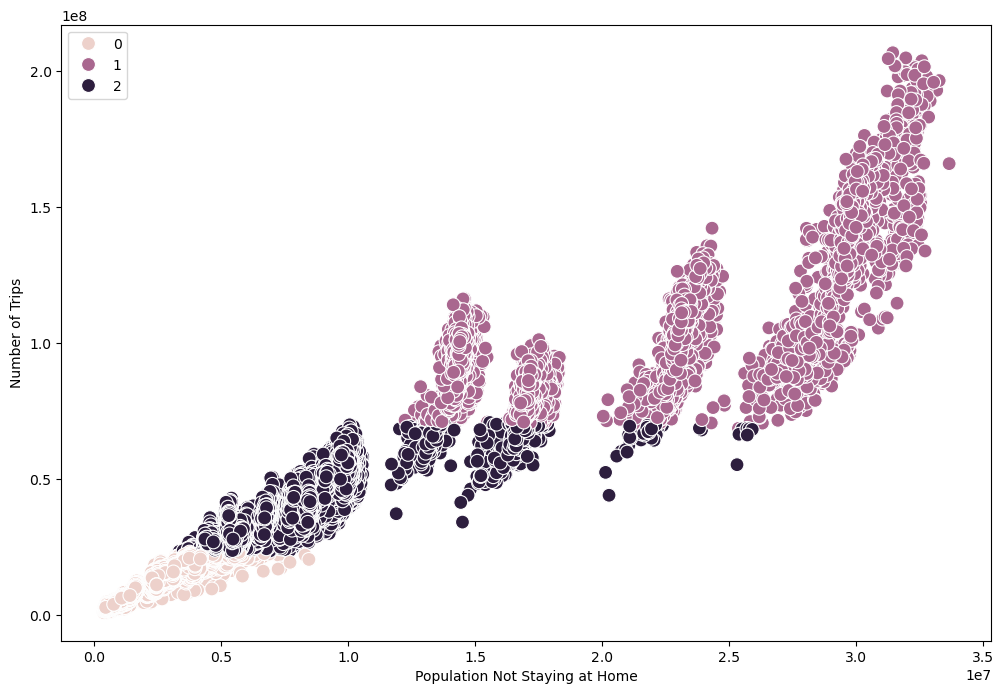

In [86]:
# plot Population Not Staying at Home vs Number of Trips

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=tripS['Population Not Staying at Home'], y=tripS['Number of Trips'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Population Not Staying at Home') 
plt.ylabel('Number of Trips') 
plt.show()

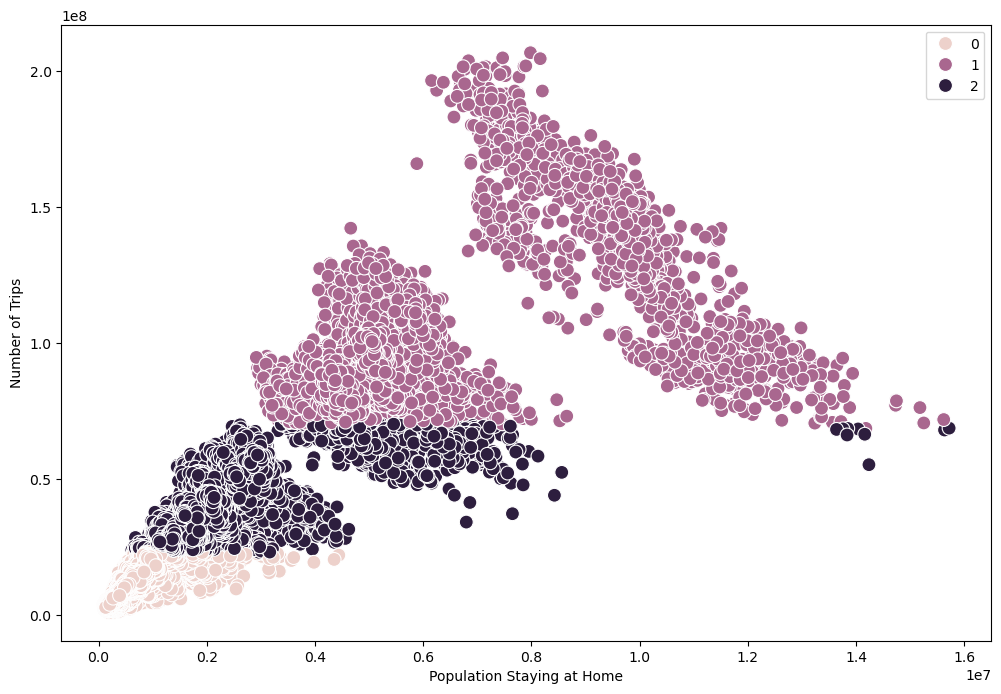

In [88]:
# plot Population Staying at Home vs Number of Trips

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=tripS['Population Staying at Home'], y=tripS['Number of Trips'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Population Staying at Home') 
plt.ylabel('Number of Trips') 
plt.show()

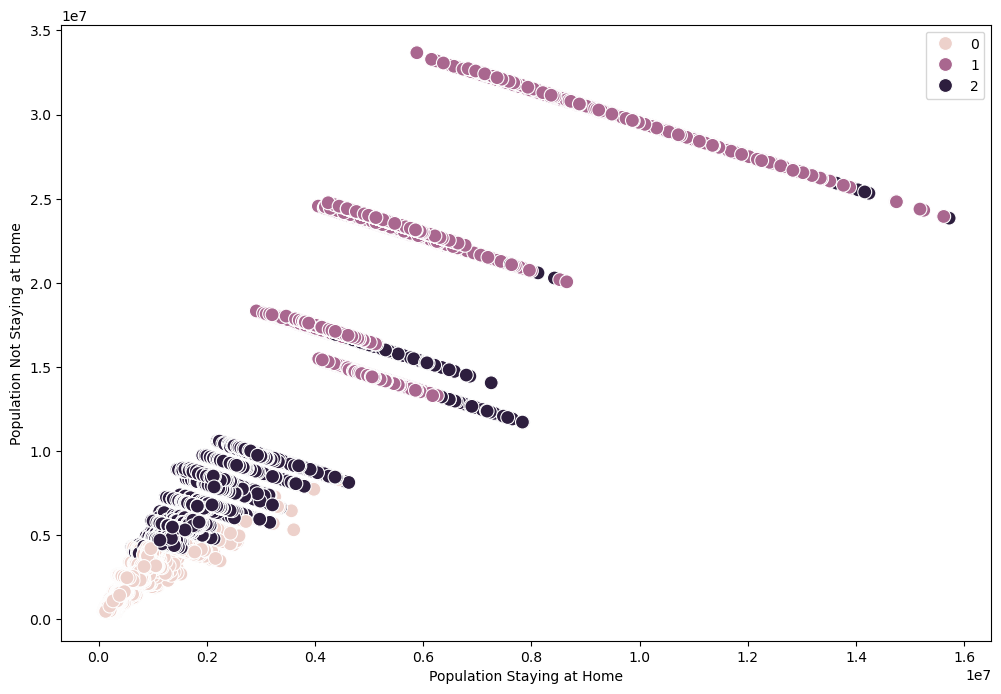

In [90]:
# plot Population Staying at Home vs Population Not Staying at Home

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=tripS['Population Staying at Home'], y=tripS['Population Not Staying at Home'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Population Staying at Home') 
plt.ylabel('Population Not Staying at Home') 
plt.show()

### groupby() analysis

In [93]:
tripS.loc[tripS['clusters'] == 2, 'cluster'] = 'dark purple'
tripS.loc[tripS['clusters'] == 1, 'cluster'] = 'purple'
tripS.loc[tripS['clusters'] == 0, 'cluster'] = 'pink'

In [95]:
tripS.groupby('cluster').agg({'Population Staying at Home':['mean', 'median'], 
                         'Population Not Staying at Home':['mean', 'median'], 
                         'Number of Trips':['mean', 'median']})

Population Staying at Home             \
                                  mean     median   
cluster                                             
dark purple               1.947865e+06  1778454.5   
pink                      5.742908e+05   461388.0   
purple                    6.302917e+06  5329320.0   

            Population Not Staying at Home             Number of Trips  \
                                      mean      median            mean   
cluster                                                                  
dark purple                   7.006884e+06   6613737.0    3.664395e+07   
pink                          2.077689e+06   1666016.5    1.011131e+07   
purple                        2.168795e+07  22825116.0    1.058977e+08   

                         
                 median  
cluster                  
dark purple  33691212.5  
pink          8916912.0  
purple       98869803.0

### The population that stays at home seems to be propotional to the number that does not. As noted in the previous exercise the number of trips varies greatly for those that do take trips